<a href="https://colab.research.google.com/github/Derevenitckaia/ML_itmo_course/blob/main/task_8_DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import os

В этом упражнении вам предлагается построить классификатор на наборе данных, полученных Национальным институтом диабета, болезней органов пищеварения и почек (National Institute of Diabetes and Digestive and Kidney Diseases). Цель состоит в том, чтобы ответить на вопрос: есть ли у пациента диабет, основываясь на определенных диагностических измерениях, включенных в набор данных, который получен из исходной базы данных наложением нескольких ограничений. В частности, в рассматриваемых в задании данных, все пациенты — женщины не менее 21 года индийского происхождения Пима.

Набор данных состоит из таких предикторов, как количество беременностей у пациентки, индекс массы тела, уровень инсулина, возраст и так далее. Отклик принимает два значение — больна (1) диабетом или нет (0).

In [20]:
df = pd.read_csv("https://courses.openedu.ru/assets/courseware/v1/f2906818eda8fcfc8f8416557ab1e6df/asset-v1:ITMOUniversity+INTROMLADVML+fall_2022_ITMO+type@asset+block/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1. Скачайте исходный набор данных и отделите от него первые 560 строк.

Введите число строк в получившейся выборке относящихся к классу 0 (пациент не болен диабетом).

In [29]:
df_train = df[0:560]
print(df_train.loc[df_train['Outcome'] == 0].shape)


(365, 9)


2. Разделите полученную выборку на тренировочную и тестовую части, в отношении 80/20 (первые 80% строк — тренировочный набор данных, остальные 20% — тестовый). Предикторами служат столбцы Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age. Отклик — Outcome.

In [51]:
from sklearn.model_selection import train_test_split

X = df_train.drop(['Outcome'], axis=1)
Y = df_train['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=False)

In [52]:
clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 15, min_samples_leaf = 10, random_state = 2020)
clf = clf.fit(X_train, y_train)
print(clf.get_depth())


9


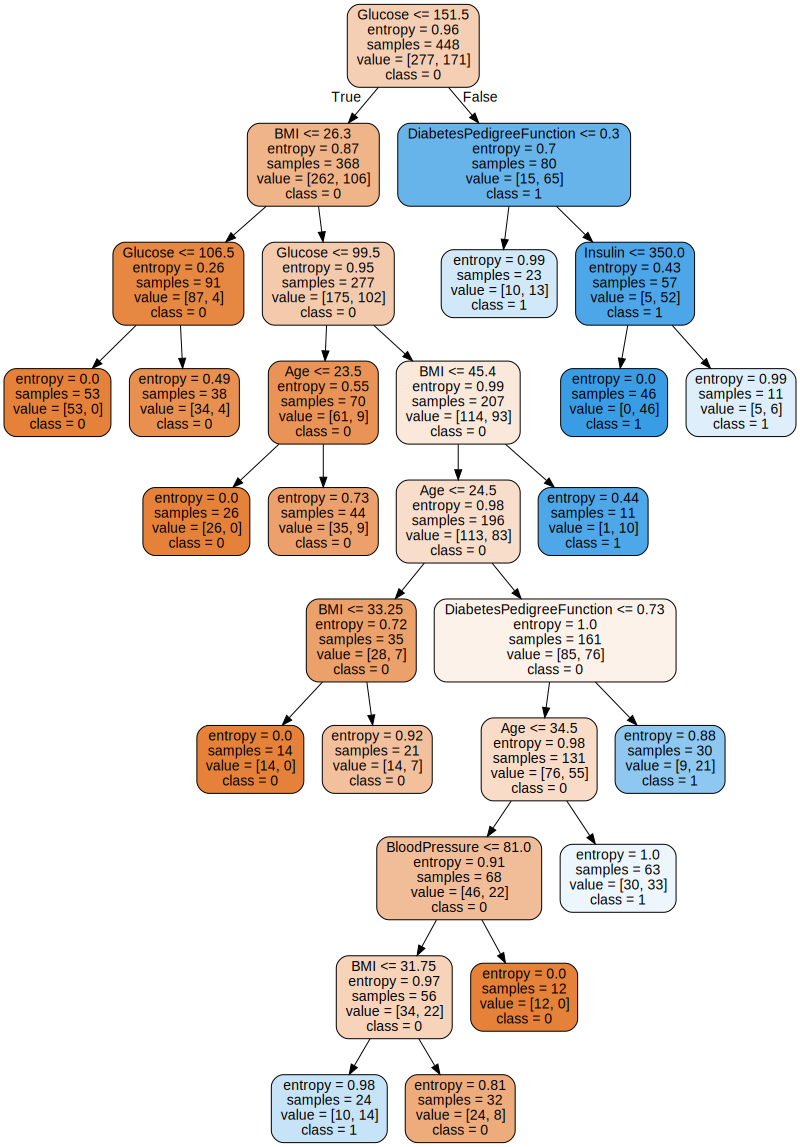

In [53]:
from sklearn.tree import export_graphviz
import graphviz 
columns = list(X.columns)
dot_data = export_graphviz(clf, out_file=None, 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all') 
graph = graphviz.Source(dot_data)  
graph

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, fbeta_score
print(accuracy_score(y_test, clf.predict(X_test)))
print(fbeta_score(y_test, clf.predict(X_test), beta = 1, average = 'macro'))

0.7589285714285714
0.6746637977407208


Выполните предсказание для пациентов 743, 707, 760, 704 (указаны номера строк, нумерация с нуля) из начального набора данных.

In [55]:
patient_numbers = (743, 707, 760, 704)
for num in patient_numbers:
  X_test = [df.iloc[num].drop('Outcome')]
  print(num, clf.predict(X_test))

743 [1]
707 [0]
760 [0]
704 [1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
